In [12]:
import patchedimage_naive as pnaive
import patchedimage as p
from utilities import *
import time

In [13]:
patch_sizes = np.arange(5, 10)
execution_time_naive = []
execution_time = []

In [14]:
for size in patch_sizes:
    start = time.time()

    imnaiv = pnaive.PatchedImage("images/maison.tif",size,search_mode="Local")
    masque = masque_circulaire((100,80),40,imnaiv.img.shape,color=False)
    imnaiv.set_masque(draw=False,masque=masque)
    imnaiv.set_priorities()

    res = imnaiv.reconstruction_auto()

    execution_time_naive.append(time.time()-start)

Reconstruct in 239.882 sec


KeyboardInterrupt: 

In [ ]:
for size in patch_sizes:
    start = time.time()

    im = p.PatchedImage("images/maison.tif",size,search_mode="Local")
    masque = masque_circulaire((100,80),40,im.img.shape,color=False)
    im.set_masque(draw=False,masque=masque,leaf_size=256)
    im.set_priorities()

    res = im.reconstruction_auto()

    execution_time.append(time.time()-start)

Size of the search zone : 199x219
==Tree construction==
0.794 sec
Reconstruct in 161.145 sec
Size of the search zone : 198x218
==Tree construction==
0.609 sec
Reconstruct in 44.523 sec
Size of the search zone : 197x217
==Tree construction==
0.630 sec
Reconstruct in 20.548 sec
Size of the search zone : 196x216
==Tree construction==
0.662 sec
Reconstruct in 13.460 sec
Size of the search zone : 195x215
==Tree construction==
0.682 sec
Reconstruct in 9.142 sec
Size of the search zone : 194x214
==Tree construction==
0.778 sec
Reconstruct in 6.929 sec
Size of the search zone : 193x213
==Tree construction==
0.814 sec
Reconstruct in 5.934 sec
Size of the search zone : 192x212
==Tree construction==
0.876 sec
Reconstruct in 5.288 sec
Size of the search zone : 191x211
==Tree construction==
0.941 sec
Reconstruct in 4.168 sec


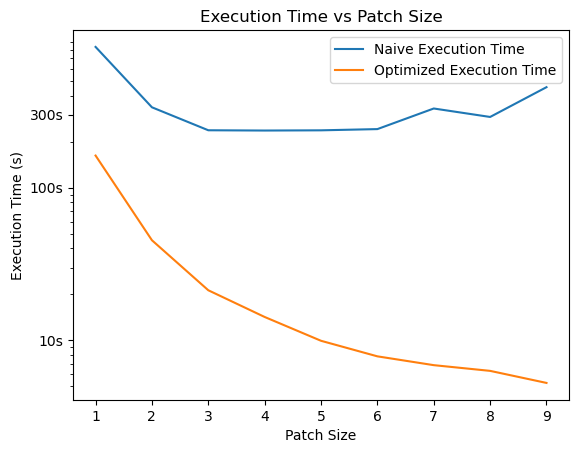

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import ticker

execution_time_naive = np.array(execution_time_naive)
execution_time = np.array(execution_time)

plt.plot(patch_sizes, execution_time_naive, label='Naive Execution Time')
plt.plot(patch_sizes, execution_time, label='Optimized Execution Time')
plt.xlabel('Patch Size')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Patch Size')
plt.yscale('log')
plt.yticks([10, 100, 300], ['10s', '100s', '300s'])  # Set y-ticks to nice values
plt.legend()
plt.show()